In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version:{sns.__version__}")
# It's so important which we use version when analiyzing.

Pandas version: 1.4.0
Numpy version: 1.22.1
Seaborn version:0.12.1


In [5]:
data  = pd.read_csv("/Users/barborostasdemir/Desktop/Most Watched Stocks of Past Decade(2013-2023)/Data/AAPL(Apple).csv")

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2513,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2514,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2515,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2516,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700
2517,2022-12-30,128.410004,129.949997,127.430000,129.929993,129.929993,76960600


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2518.0,6.238339e+01,4.868303e+01,1.385607e+01,2.697125e+01,4.135375e+01,9.127250e+01,1.826300e+02
High,2518.0,6.308769e+01,4.932213e+01,1.427143e+01,2.721938e+01,4.187250e+01,9.288188e+01,1.829400e+02
Low,2518.0,6.169666e+01,4.805104e+01,1.375357e+01,2.670500e+01,4.088875e+01,9.082438e+01,1.791200e+02
Close,2518.0,6.241660e+01,4.870979e+01,1.394750e+01,2.698375e+01,4.131375e+01,9.152687e+01,1.820100e+02
Adj Close,2518.0,6.063703e+01,4.924866e+01,1.206458e+01,2.467664e+01,3.951167e+01,9.012293e+01,1.809597e+02
Volume,2518.0,1.713540e+08,1.250498e+08,3.519590e+07,9.188698e+07,1.301368e+08,2.045116e+08,1.460852e+09


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [10]:
data["Open"].value_counts()

39.375000     3
15.858929     3
29.010000     3
27.500000     3
127.820000    3
             ..
23.847500     1
23.650000     1
23.924999     1
24.122499     1
127.989998    1
Name: Open, Length: 2392, dtype: int64

##### We are remove all this empty data

In [11]:
data.columns = data.columns.str.replace(' ','_')

In [12]:
data.head(3)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600


In [13]:
data['Adj_Close'].value_counts()

22.126379     2
25.206301     2
28.075510     2
45.083485     2
25.724186     2
             ..
20.914917     1
20.956585     1
21.734476     1
21.644180     1
129.929993    1
Name: Adj_Close, Length: 2481, dtype: int64

In [14]:
data["Close"].value_counts()

24.905001     3
26.705000     3
25.187500     3
43.125000     3
31.650000     3
             ..
23.010000     1
23.397499     1
23.600000     1
23.972500     1
129.929993    1
Name: Close, Length: 2389, dtype: int64

In [15]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

* there is no "Nan" here

In [16]:
data.iloc[:16, 0:10]

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200
5,2013-01-09,18.660713,18.750357,18.428213,18.467857,15.882133,407604400
6,2013-01-10,18.876785,18.882856,18.411428,18.696787,16.079004,601146000
7,2013-01-11,18.607143,18.761429,18.536428,18.582144,15.980417,350506800
8,2013-01-14,17.952856,18.125000,17.803928,17.919643,15.410674,734207600
9,2013-01-15,17.796429,17.821072,17.263571,17.354286,14.924473,876772400


In [17]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

* We see that the data type is object, you can convert it to the date type

In [18]:
data['Date'] = pd.to_datetime(data["Date"])

In [19]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
dtype: object

* lets check date type

##### A profit and loss statement is a financial report that shows how much your business has spent and earned over a specified time. 

In [20]:
data["Gain/Loss"] = data["Open"]- data["Close"]

In [21]:
data

,Date,Open,High,Low,Close,Adj_Close,Volume,Gain/Loss
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,0.171072
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,0.206428
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,0.356072
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400,-0.067857
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200,0.139286
...,...,...,...,...,...,...,...,...
2513,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900,-0.940003
2514,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800,1.350006
2515,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400,3.629997
2516,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700,-1.620003


* By subtracting the closing from the opening, we find out which day the apple company entered a loss - by taking a value

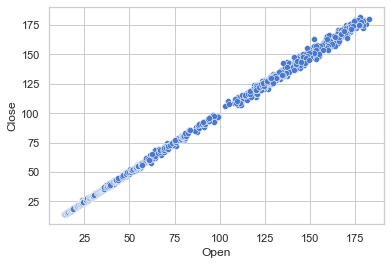

In [41]:
sns.set_theme(style='whitegrid', palette='muted')
sns.scatterplot(data=data, x='Open', y='Close');

# We are making sure that the profit and loss forecast and the typical closing value match.

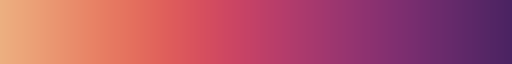

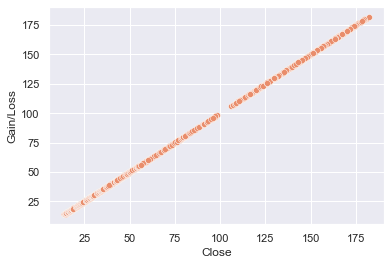

In [47]:
sns.set_theme(style='darkgrid', palette = 'flare')
sns.scatterplot(data=data, x = 'Adj_Close', y ='Gain/Loss'); 
sns.color_palette("flare", as_cmap=True)

## The percentage of actual closing value to average closing value

Text(0, 0.5, 'The percentage of actual closing value to average closing value')

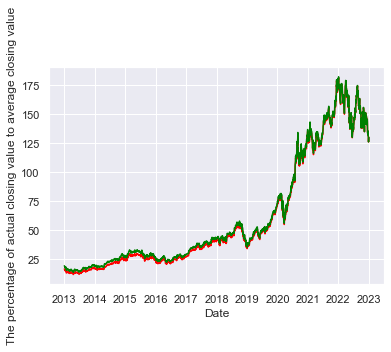

In [50]:
plt.Figure(figsize=(12,6))
plt.plot(data.Date, data.Adj_Close,color='red');
plt.plot(data.Date, data.Close, color = 'green');

plt.xlabel('Date')
plt.ylabel('The percentage of actual closing value to average closing value')

- We can see this fall between 2013-2019

## How many sales were necessary to cover the loss?

Text(0, 0.5, 'loss status with average capture')

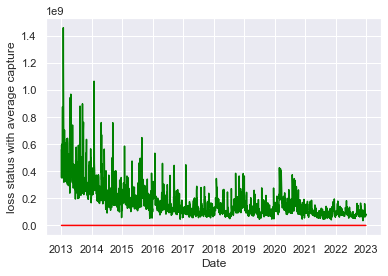

In [51]:
plt.Figure(figsize=(12,6))
plt.plot(data.Date, data["Gain/Loss"],color='red');
plt.plot(data.Date, data.Volume, color = 'green');

plt.xlabel('Date')
plt.ylabel('loss status with average capture')

### let's find out how many is the 5-day average

In [24]:
data['AdjM5'] = data['Adj_Close'].rolling(5, min_periods=1).mean()

In [25]:
data.head(3)

,Date,Open,High,Low,Close,Adj_Close,Volume,Gain/Loss,AdjM5
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,0.171072,16.862818
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,0.206428,16.756400
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,0.356072,16.566333


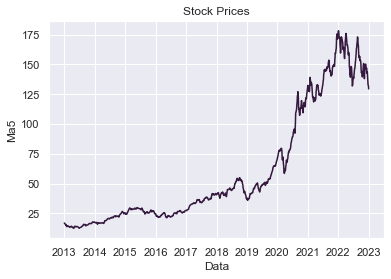

In [26]:
# we select what we require
plt.plot(data['Date'],data['AdjM5'])
plt.title('Stock Prices')
#we adjust the values of x and y
plt.xlabel('Data')
plt.ylabel('Ma5'),;

### We check the data with train test

In [27]:
X_train,X_test,y_train, y_test = train_test_split(data[['Adj_Close']],data[['AdjM5']], test_size=0.25)
# The size of the split can be specified via the “test_size” argument that takes a number of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.


In [28]:
reg = LinearRegression()

In [29]:
reg.fit(X_train,y_train)

LinearRegression()

In [30]:
preds = reg.predict(X_test)

In [31]:
print("Model Coefficiets:", reg.coef_)
print("Mean Abloute Error:", mean_absolute_error(y_test, preds))
print("Coefficient of Determination:", r2_score(y_test,preds))

Model Coefficiets: [[0.99902515]]
Mean Abloute Error: 0.9163922268704487
Coefficient of Determination: 0.9989225362003329


#### let's find out how many is the 10-day average

In [32]:
data['AdjM10'] =  data['Adj_Close'].rolling(9,min_periods=1).mean()

In [33]:
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Gain/Loss,AdjM5,AdjM10
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,0.171072,16.862818,16.862818
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,0.206428,16.756400,16.756400
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,0.356072,16.566333,16.566333
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400,-0.067857,16.447496,16.447496
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200,0.139286,16.384855,16.384855


In [34]:
data['Gain/Loss'] = data['Close']

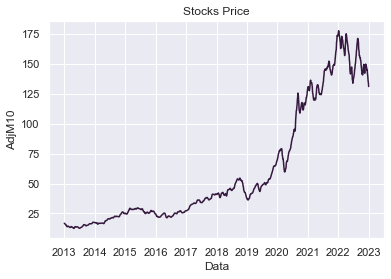

In [35]:
plt.plot(data['Date'],data['AdjM10'])
plt.title("Stocks Price")
plt.xlabel('Data')
plt.ylabel('AdjM10')
plt.show;

In [36]:
X_train, X_test, y_train,y_test = train_test_split(data[['Adj_Close']],data['AdjM10'], test_size=0.25)
# The size of the split can be specified via the “test_size” argument that takes a number of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.

In [37]:
reg = LinearRegression()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)

In [38]:
print("Model Coefficients:", reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test,preds))
print("Cofficient of Determination:", r2_score(y_test,preds))

Model Coefficients: [0.99718817]
Mean Absolute Error: 1.302550652892313
Cofficient of Determination: 0.9979268620138703
